In [10]:
import os
import pandas as pd

In [26]:
PROCESSED_DATA_DIR = '../dataset/processed/states'

state_dirs = [d for d in os.listdir(PROCESSED_DATA_DIR) if os.path.isdir(os.path.join(PROCESSED_DATA_DIR, d))]
state_dirs.sort()

data_frames = []

for state_dir in state_dirs:
    state_path = os.path.join(PROCESSED_DATA_DIR, state_dir)
    if not os.path.isdir(state_path):
        continue
    
    csv_files = [f for f in os.listdir(state_path) if f.endswith('.csv')]
    csv_files.sort()
    
    if csv_files:
        first_csv = csv_files[0]
        file_path = os.path.join(state_path, first_csv)
        
        try:
            df = pd.read_csv(file_path)
            df = df[['year', 'period', 'value']].copy()
            df['month'] = df['period'].str.extract(r'M(\d{2})').astype(int)
            df['year'] = df['year'].astype(int)
            df['unemployment_rate'] = pd.to_numeric(df['value'], errors='coerce').fillna(0)
            df['state'] = state_dir
            df_1 = df[['state', 'year', 'month', 'unemployment_rate']]
            data_frames.append(df_1)
        except Exception as e:
            print(f"Error reading {first_csv} in {state_dir}: {e}")
    else:
        print(f"No CSV files found in {state_dir}")
    
combined_df = pd.concat(data_frames, ignore_index=True)
print(combined_df)

         state  year  month  unemployment_rate
0      Alabama  1976      1                6.7
1      Alabama  1976      2                6.6
2      Alabama  1976      3                6.6
3      Alabama  1976      4                6.5
4      Alabama  1976      5                6.4
...        ...   ...    ...                ...
29691  Wyoming  2024     10                3.5
29692  Wyoming  2024     11                3.6
29693  Wyoming  2024     12                3.5
29694  Wyoming  2025      1                3.6
29695  Wyoming  2025      2                3.5

[29696 rows x 4 columns]


In [27]:
import seaborn as sns
combined_df['date'] = pd.to_datetime(combined_df[['year','month']].assign(DAY=1))
print(combined_df)

         state  year  month  unemployment_rate       date
0      Alabama  1976      1                6.7 1976-01-01
1      Alabama  1976      2                6.6 1976-02-01
2      Alabama  1976      3                6.6 1976-03-01
3      Alabama  1976      4                6.5 1976-04-01
4      Alabama  1976      5                6.4 1976-05-01
...        ...   ...    ...                ...        ...
29691  Wyoming  2024     10                3.5 2024-10-01
29692  Wyoming  2024     11                3.6 2024-11-01
29693  Wyoming  2024     12                3.5 2024-12-01
29694  Wyoming  2025      1                3.6 2025-01-01
29695  Wyoming  2025      2                3.5 2025-02-01

[29696 rows x 5 columns]


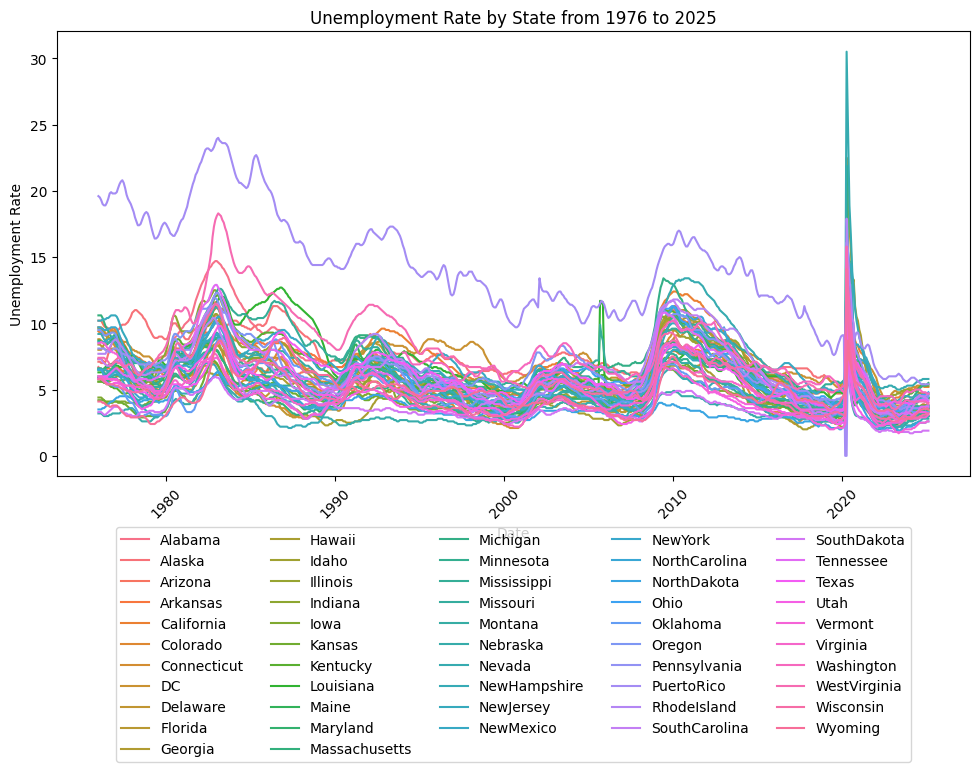

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.lineplot(data=combined_df, x='date', y='unemployment_rate', hue='state')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.xticks(rotation=45)
plt.title('Unemployment Rate by State from 1976 to 2025')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')

plt.tight_layout()
plt.show()